<div style="padding:15px;color:white;margin:0;font-size:30px;font-family:Times New Roman;text-align:center;display:fill;border-radius:15px;background-color:#112849;overflow:hidden"><b>Pizza Sales Dataset</b></div>

***

<div style="padding:15px;color:#112849;margin:0;font-size:25px;font-family:Times New Roman;text-align:left;display:fill;border-radius:2px;background-color:#fffff;overflow:hidden"><b>Overview</b></div>

<a id = 'home' ></a>
I. [About dataset](#Dataset) <br>

 1. [Description](#Description) <br>
 2. [Columns](#Columns) <br>
 
II. [Data Loading and Exploration](#Data) <br>
 1. [Import Libraries](#import) <br>
 2. [Data Loading](#loading) <br>
 3. [The Shape Of The Dataset](#Shape) <br>
 4. [The Dataset Information](#Information) <br>
 5. [Changing Data Type; Dealing With The Missing Values And Dropping No Need Columns](#Change) <br>
 6. [Find Duplications And Analyse Them](#Duplications) <br>
 7. [Descriptive Statistics](#Statistics) <br>
 8. [Exploratory Data Analysis](#EDA) <br>

<div style="padding:15px;color:#112849;margin:0;font-size:25px;font-family:Times New Roman;text-align:left;display:fill;border-radius:2px;background-color:#fffff;overflow:hidden"><b>I. About dataset</b></div>
<a id = 'Dataset' ></a>

### 1. Description:
<a id = 'Description' ></a>
<div style="border-radius:10px;color:#black; border:#DFC296 solid;padding: 10px;background-color:#DFC296;font-size:110%;text-align:justify">
This dataset contain detailed information about pizza orders, including specifics about the pizza variants, quantities, pricing, dates, times, and categorization details.</div>
    
### 2. Columns:
<a id = 'Columns' ></a>
|No. | Columns | Description |
|:--- | :--- |:--- |
| 1 |pizza_id | A unique identifier assigned to each distinct pizza variant available for ordering. |
| 2 |order_id | A unique identifier for each order made, which links to multiple pizzas. |
| 3 |pizza_name_id |  An identifier linking to a specific name of the pizza. |
| 4 |quantity | The number of units of a specific pizza variant ordered within an order. |
| 5 |order_date | The date when the order was placed. |
| 6 |order_time | The time when the order was placed. |
| 7 |unit_price | The cost of a single unit of the specific pizza variant. |
| 8 |total_price | The aggregated cost of all units of a specific pizza variant in an order. |
| 9 |pizza_size | Represents the size of the pizza (e.g., small, medium, large). |
| 10 |pizza_category | Indicates the category of the pizza, such as vegetarian, non-vegetarian, etc. |
| 11 |pizza_ingredients| Provides a list or description of the ingredients used in the pizza. |
| 12 |pizza_name | Specifies the name of the specific pizza variant ordered. |

<div style="padding:15px;color:#112849;margin:0;font-size:25px;font-family:Times New Roman;text-align:left;display:fill;border-radius:2px;background-color:#fffff;overflow:hidden"><b>II. Data Loading and Exploration | Cleaning</b></div>
<a id = 'Data' ></a>

[Home](#home) <br>

### 1. Import Libraries: 
<a id = 'import' ></a>


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

[Home](#home) <br>
### 2. Data Loading:
<a id = 'loading' ></a>

In [2]:
os.chdir(r'E:\Python')
df = pd.read_csv(r'pizza_sales.csv')
display(df.head(2))
display(df.tail(2))

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620.0,21350.0,bbq_ckn_s,1.0,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [3]:
# Change some features' positions so that we can be studied easily.
df = df.reindex(columns = ['pizza_id', 'pizza_name_id', 'pizza_name', 'pizza_size', \
                      'pizza_category', 'pizza_ingredients', 'order_id', 'order_date', 'order_time', 'quantity', \
                      'unit_price', 'total_price'])
display(df.sample(5))

,pizza_id,pizza_name_id,pizza_name,pizza_size,pizza_category,pizza_ingredients,order_id,order_date,order_time,quantity,unit_price,total_price
36206,36207.0,the_greek_xl,The Greek Pizza,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",15985.0,26-09-2015,20:25:42,1.0,25.50,25.50
7951,7952.0,hawaiian_l,The Hawaiian Pizza,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",3494.0,28-02-2015,16:34:35,1.0,16.50,16.50
893,894.0,soppressata_l,The Soppressata Pizza,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",392.0,7/1/2015,13:36:47,1.0,20.75,20.75
21945,21946.0,calabrese_m,The Calabrese Pizza,M,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",9637.0,11/6/2015,13:11:46,1.0,16.25,16.25
22724,22725.0,hawaiian_m,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",9995.0,17-06-2015,11:43:15,1.0,13.25,13.25


[Home](#home) <br>
### 3. The Shape Of The Dataset:
<a id = 'Shape' ></a>

In [4]:
print(f'The Number of Rows are {df.shape[0]:,}  and Columns are {df.shape[1]:,}.')

The Number of Rows are 48,620  and Columns are 12.


[Home](#home) <br>
### 4. The Dataset Information:
<a id = 'Information' ></a>

In [5]:
df.columns

Index(['pizza_id', 'pizza_name_id', 'pizza_name', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'order_id', 'order_date',
       'order_time', 'quantity', 'unit_price', 'total_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   pizza_name_id      48620 non-null  object 
 2   pizza_name         48620 non-null  object 
 3   pizza_size         48620 non-null  object 
 4   pizza_category     48620 non-null  object 
 5   pizza_ingredients  48620 non-null  object 
 6   order_id           48620 non-null  float64
 7   order_date         48620 non-null  object 
 8   order_time         48620 non-null  object 
 9   quantity           48620 non-null  float64
 10  unit_price         48620 non-null  float64
 11  total_price        48620 non-null  float64
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [7]:
display(df.isnull().sum().sort_values(ascending = False))
display(round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False))

pizza_id             0
pizza_name_id        0
pizza_name           0
pizza_size           0
pizza_category       0
pizza_ingredients    0
order_id             0
order_date           0
order_time           0
quantity             0
unit_price           0
total_price          0
dtype: int64

pizza_id             0.0
pizza_name_id        0.0
pizza_name           0.0
pizza_size           0.0
pizza_category       0.0
pizza_ingredients    0.0
order_id             0.0
order_date           0.0
order_time           0.0
quantity             0.0
unit_price           0.0
total_price          0.0
dtype: float64

**💬 Observation:** 
1. There are **`48,620`** rows and **`12`** columns in the dataset.
2. The columns in the datasets are: **`pizza_id `, `pizza_name_id `, `pizza_name `, `pizza_size `, `pizza_category `, `pizza_ingredients `, `order_id `, `order_date `, `order_time `, `quantity `, `unit_price `, `total_price `**
3. Numerical Features: **`pizza_id `, `order_id `, `quantity `, `unit_price `, `total_price `**
4. Categorical Features: **`pizza_name_id `, `pizza_name `, `pizza_size `, `pizza_category `, `pizza_ingredients `**
5. Date/time Features: **`order_date `, `order_time `**
6. Columns that have null values: **No Null column**
7. No need columns: **`pizza_id` , `pizza_name_id`**

[Home](#home) <br>
### 5. Changing Data Type; Dealing With The Missing Values And Dropping No Need Columns:
<a id = 'Change' ></a>
####  - Changing Data Type:

In [8]:
df['order_date'].unique()[:25]

array(['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015',
       '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015',
       '11/1/2015', '12/1/2015', '13-01-2015', '14-01-2015', '15-01-2015',
       '16-01-2015', '17-01-2015', '18-01-2015', '19-01-2015',
       '20-01-2015', '21-01-2015', '22-01-2015', '23-01-2015',
       '24-01-2015', '25-01-2015'], dtype=object)

In [9]:
df['order_time'].unique()[:25]

array(['11:38:36', '11:57:40', '12:12:28', '12:16:31', '12:21:30',
       '12:29:36', '12:50:37', '12:51:37', '12:52:01', '13:00:15',
       '13:02:59', '13:04:41', '13:11:55', '13:14:19', '13:33:00',
       '13:34:07', '13:53:00', '13:57:08', '13:59:09', '14:03:08',
       '14:14:29', '14:16:26', '14:19:03', '14:23:01', '14:44:44'],
      dtype=object)

In [10]:
df['order_date'] = df['order_date'].str.replace('/','-')
df.insert(8,'order_date_time',df['order_date'] + " " + df['order_time'])
df['order_date'] = pd.to_datetime(df['order_date'],format = '%d-%m-%Y')
df['order_date_time'] = pd.to_datetime(df['order_date_time'],format = '%d-%m-%Y %H:%M:%S')
df.dtypes

pizza_id                    float64
pizza_name_id                object
pizza_name                   object
pizza_size                   object
pizza_category               object
pizza_ingredients            object
order_id                    float64
order_date           datetime64[ns]
order_date_time      datetime64[ns]
order_time                   object
quantity                    float64
unit_price                  float64
total_price                 float64
dtype: object

#### - Dealing With The Missing Values:

In [11]:
display(df.isnull().sum().sort_values(ascending = False))

pizza_id             0
pizza_name_id        0
pizza_name           0
pizza_size           0
pizza_category       0
pizza_ingredients    0
order_id             0
order_date           0
order_date_time      0
order_time           0
quantity             0
unit_price           0
total_price          0
dtype: int64

#### - Dropping No Need Columns:

In [12]:
df.drop(['pizza_id','pizza_name_id', 'order_time'], axis = 1, inplace = True)
df.head(2)

,pizza_name,pizza_size,pizza_category,pizza_ingredients,order_id,order_date,order_date_time,quantity,unit_price,total_price
0,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1.0,2015-01-01,2015-01-01 11:38:36,1.0,13.25,13.25
1,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2.0,2015-01-01,2015-01-01 11:57:40,1.0,16.00,16.00


[Home](#home) <br>
### 6. Find Duplications And Analyse Them:
<a id = 'Duplications' ></a>

In [13]:
df.duplicated().sum()

0

**💬 Observation:** 
- No duplicates found

[Home](#home) <br>
### 7. Descriptive Statistics:
<a id = 'Statistics' ></a>

In [14]:
display(df.describe())
print('-'*70)
display(df.describe(include = 'object'))
print('-'*70)
display(df[['order_date']].agg(['min','max']))

,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,1.019622,16.494132,16.821474
std,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,9.750000,9.750000
25%,5337.000000,1.000000,12.750000,12.750000
50%,10682.500000,1.000000,16.500000,16.500000
75%,16100.000000,1.000000,20.250000,20.500000
max,21350.000000,4.000000,35.950000,83.000000


----------------------------------------------------------------------


,pizza_name,pizza_size,pizza_category,pizza_ingredients
count,48620,48620,48620,48620
unique,32,5,4,32
top,The Classic Deluxe Pizza,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
freq,2416,18526,14579,2416


----------------------------------------------------------------------


,order_date
min,2015-01-01
max,2015-12-31


**💬 Observation:** 
1. The data contains values in a financial year from *`01/01/2015`* to *`31/12/2015`*.
2. There are `21,350` orders in this dataset
3. The least quantity sold per transaction is *`1`* and the most quantity sold is *`4`*. 
4. The cheapest pizza is *`9.75`* and the most expensive item is *`35.95`*
5. There are `32` different types of pizza, `5` sizes, and `4` pizza categories in the dataset.

[Home](#home) <br>
### 8. Exploratory Data Analysis:
<a id = 'EDA' ></a>

#### - Extract some date-time columns

In [15]:
# Extract year
df['year'] = df['order_date_time'].dt.year

# Extract month_year
df['month_year'] = df['order_date_time'].dt.strftime('%b %Y')

# Extract month 
df['month'] = df['order_date_time'].dt.month

# Extract month name 
df['month_name'] = df['order_date_time'].dt.month_name()

# Extract day 
df['day'] = df['order_date_time'].dt.day

# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df['order_date_time'].dt.dayofweek

# Extract the day of the week name
df['day_name'] = df['order_date_time'].dt.day_name()

# Extract time (Hour)
df['hour'] = df['order_date_time'].dt.strftime('%H')

df.sample(5)

,pizza_name,pizza_size,pizza_category,pizza_ingredients,order_id,order_date,order_date_time,quantity,unit_price,total_price,year,month_year,month,month_name,day,day_of_week,day_name,hour
34468,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",15215.0,2015-09-11,2015-09-11 19:23:28,1.0,18.50,18.50,2015,Sep 2015,9,September,11,4,Friday,19
18807,The Spinach Pesto Pizza,S,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",8264.0,2015-05-18,2015-05-18 19:35:01,1.0,12.50,12.50,2015,May 2015,5,May,18,0,Monday,19
43034,The Pepperoni Pizza,L,Classic,"Mozzarella Cheese, Pepperoni",18917.0,2015-11-19,2015-11-19 16:49:14,1.0,15.25,15.25,2015,Nov 2015,11,November,19,3,Thursday,16
9081,The Green Garden Pizza,M,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",3984.0,2015-03-08,2015-03-08 18:28:07,1.0,16.00,16.00,2015,Mar 2015,3,March,8,6,Sunday,18
24492,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",10763.0,2015-06-30,2015-06-30 14:17:06,1.0,16.00,16.00,2015,Jun 2015,6,June,30,1,Tuesday,14


#### - Visualization some values

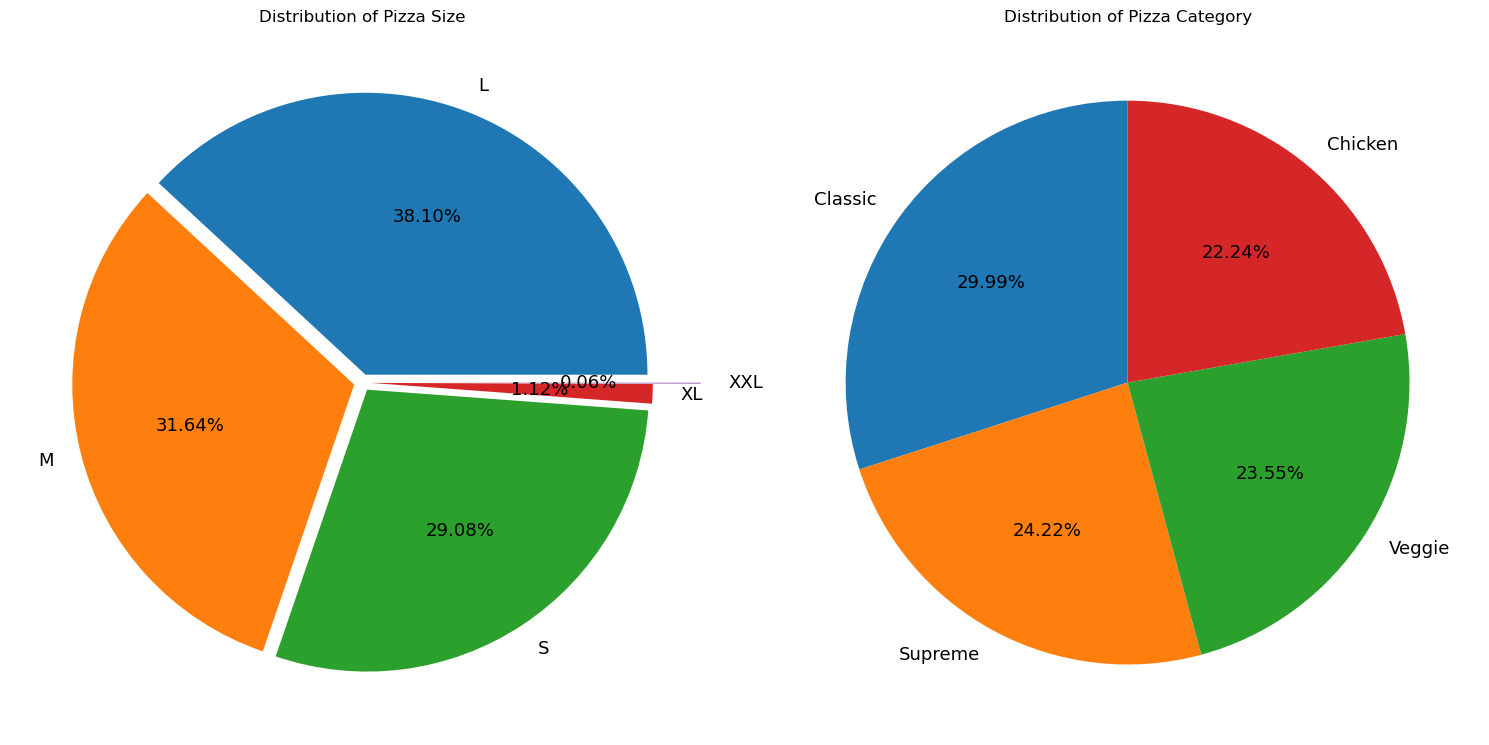

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,12))

df['pizza_size'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', fontsize = 13, \
                                     ax = ax[0], title = 'Distribution of Pizza Size', explode = [0.03,0.03,0.03,0.03,0.2])
ax[0].set_ylabel('')
df['pizza_category'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', fontsize = 13, \
                                     ax = ax[1], startangle = 90, title = 'Distribution of Pizza Category')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show();

**💬 Observation:** 
***
1. Most pizzas are S, M, and L sizes, with very few XL and XXL pizzas
2. Nearly 30% of customers prefer Classic pizza, followed by Supreme at 24%

In [17]:
# list_price
list_price_temp = df[['pizza_name', 'pizza_size', 'unit_price']].drop_duplicates().\
                sort_values(by = ['pizza_name', 'pizza_size', 'unit_price'], ascending = [True, False, False]).\
                reset_index(drop = True)

list_price = pd.pivot_table(list_price_temp, index = 'pizza_name', columns = 'pizza_size' , \
                            values = 'unit_price', aggfunc = sum, fill_value = 'x').reset_index()

print('Price list of Pizzas:')
display(list_price)


Price list of Pizzas:


pizza_size,pizza_name,L,M,S,XL,XXL
0,The Barbecue Chicken Pizza,20.75,16.75,12.75,x,x
1,The Big Meat Pizza,x,x,12.0,x,x
2,The Brie Carre Pizza,x,x,23.65,x,x
3,The Calabrese Pizza,20.25,16.25,12.25,x,x
4,The California Chicken Pizza,20.75,16.75,12.75,x,x
5,The Chicken Alfredo Pizza,20.75,16.75,12.75,x,x
6,The Chicken Pesto Pizza,20.75,16.75,12.75,x,x
7,The Classic Deluxe Pizza,20.5,16.0,12.0,x,x
8,The Five Cheese Pizza,18.5,x,x,x,x
9,The Four Cheese Pizza,17.95,14.75,x,x,x


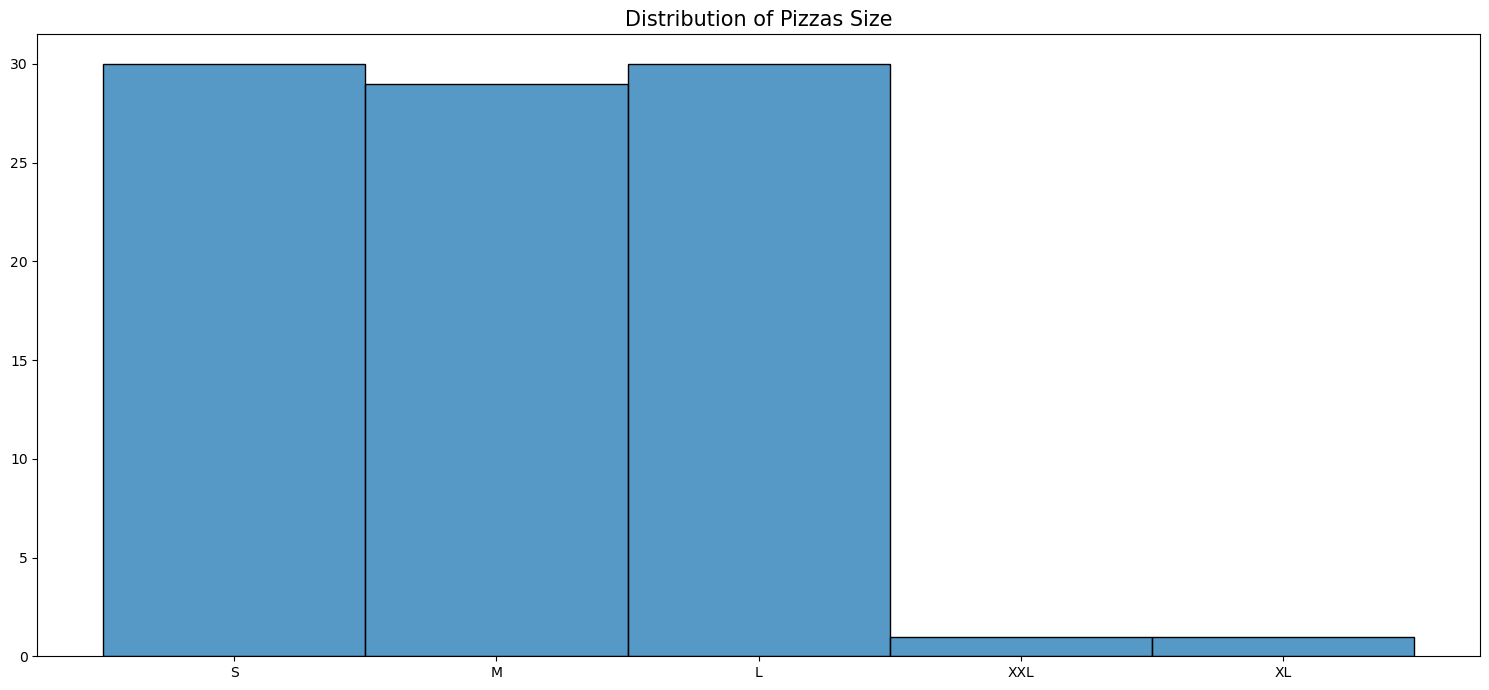

In [18]:
fig , ax = plt.subplots(1, 1, figsize = (15,7))

sns.histplot(data = list_price_temp, x = 'pizza_size')

ax.set_title('Distribution of Pizzas Size', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show();

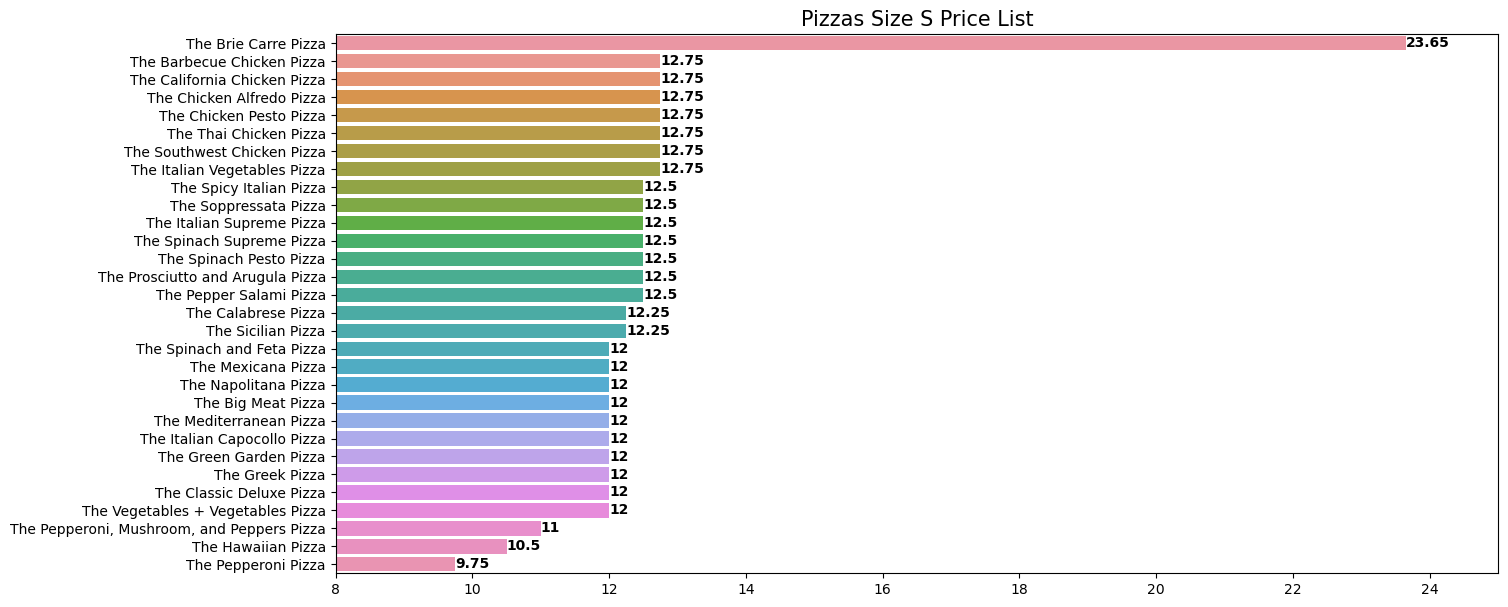

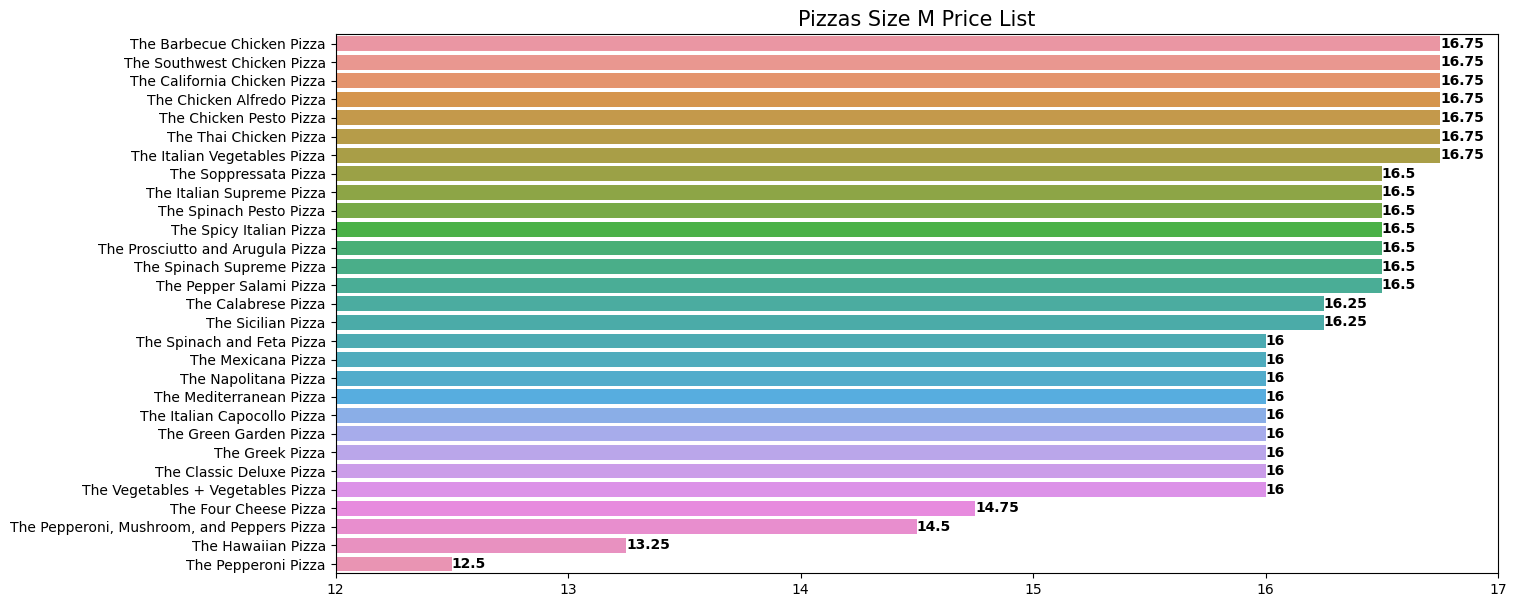

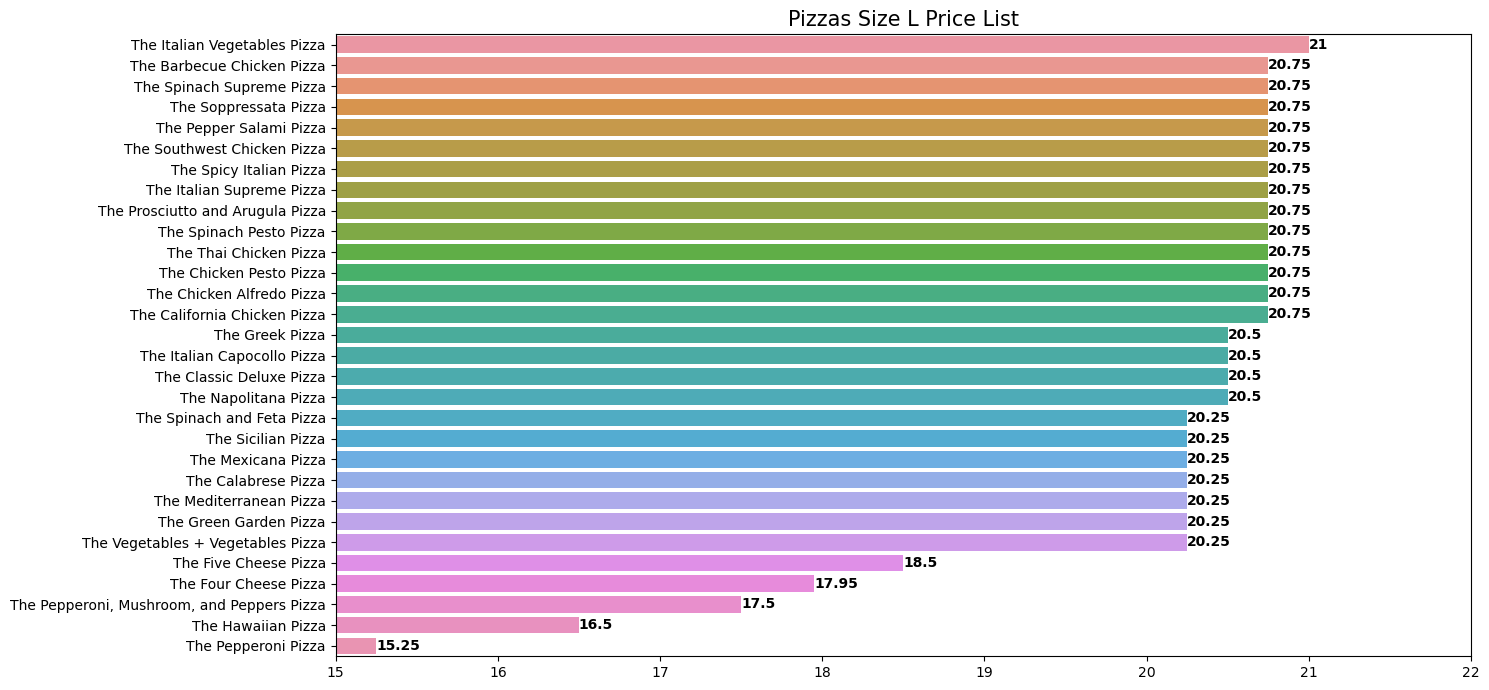

The most expensive pizza by size:


pizza_size,L,M,S,XL,XXL
unit_price,21.0,16.75,23.65,25.5,35.95


The most cheapest pizza by size:


pizza_size,L,M,S,XL,XXL
unit_price,15.25,12.5,9.75,25.5,35.95


In [19]:
fig , ax = plt.subplots(1, 1, figsize = (15,7))
list_price_temp_S = list_price_temp[list_price_temp['pizza_size'] == 'S'].sort_values(by = 'unit_price', ascending = False)
sns.barplot(data = list_price_temp_S, x = 'unit_price', y = 'pizza_name', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize =10)

ax.set_title('Pizzas Size S Price List', size = 15)
ax.set_xlim(8,25)
ax.set_xlabel('')
ax.set_ylabel('')

fig , ax = plt.subplots(1, 1, figsize = (15,7))
list_price_temp_M = list_price_temp[list_price_temp['pizza_size'] == 'M'].sort_values(by = 'unit_price', ascending = False)
sns.barplot(data = list_price_temp_M, x = 'unit_price', y = 'pizza_name', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize =10)

ax.set_title('Pizzas Size M Price List', size = 15)
ax.set_xlim(12,17)
ax.set_xlabel('')
ax.set_ylabel('')

fig , ax = plt.subplots(1, 1, figsize = (15,7))
list_price_temp_L = list_price_temp[list_price_temp['pizza_size'] == 'L'].sort_values(by = 'unit_price', ascending = False)
sns.barplot(data = list_price_temp_L, x = 'unit_price', y = 'pizza_name', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize =10)

ax.set_title('Pizzas Size L Price List', size = 15)
ax.set_xlim(15,22)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show();

print('The most expensive pizza by size:')
display(list_price_temp.groupby('pizza_size').max('unit_price').T)
print('The most cheapest pizza by size:')
display(list_price_temp.groupby('pizza_size').min('unit_price').T)

**💬 Observation:**

1. Pizzas of the same size have relatively similar prices.
2. Size S: 
- The Brie Carre Pizza has the highest price at 23.65 / piece and is more expensive than the L-size pizzas
- The Pepperoni Pizza has the lowest price at 9.75 / Piece
- The remaining pizzas have prices ranging from 10.5 - 12.75 / Piece
3. Size M: 
- The highest-priced pizza is 16.75 per piece
- The Pepperoni Pizza is the lowest priced at 12.5 per piece
- The remaining pizzas range in price from 13.25 - 16.5 per piece
4. Size L: 
- The Italian Vegetables Pizza has the highest price at 21/piece
- The Pepperoni Pizza has the lowest price at 15.25/piece
- The remaining pizzas range in price from 16.5 - 20.75/piece
5. Only The Greek Pizza has XL and XXL sizes with prices of 25.5 and 35.95 respectively.


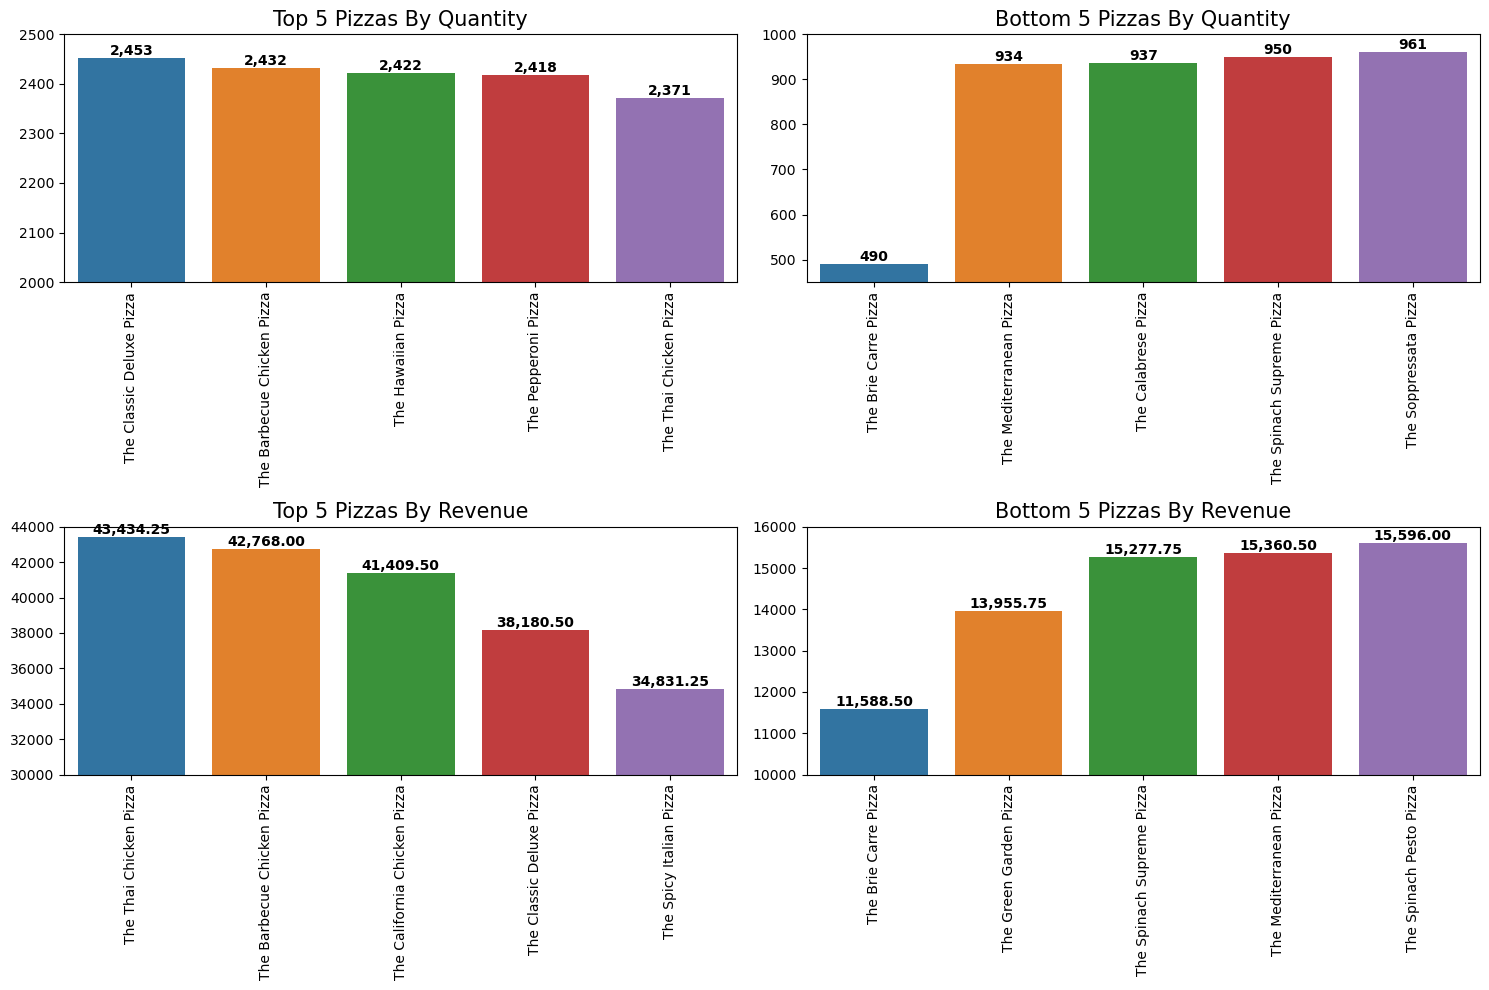

In [20]:

Top5_quatity = df.groupby('pizza_name').agg({'quantity': sum}).reset_index().sort_values(by = 'quantity', ascending = False).head(5)
# display(Top5_quatity)

Bot5_quatity = df.groupby('pizza_name').agg({'quantity': sum}).reset_index().sort_values(by = 'quantity', ascending = True).head(5)
# display(Bot5_quatity)

Top5_revenue = df.groupby('pizza_name').agg({'total_price' : sum}).reset_index().sort_values(by = 'total_price', ascending = False).head(5)
# display(Top5_revenue)

Bot5_revenue = df.groupby('pizza_name').agg({'total_price' : sum}).reset_index().sort_values(by = 'total_price', ascending = True).head(5)
# display(Bot5_revenue)


fig, ax = plt.subplots(2, 2, figsize = (15,10))
sns.barplot(data = Top5_quatity, x = 'pizza_name', y = 'quantity', ax = ax[0,0])
ax[0,0].bar_label(ax[0,0].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.0f}')

ax[0,0].set_title('Top 5 Pizzas By Quantity', size = 15)
ax[0,0].set_ylim(2000,2500)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,0].tick_params(axis='x', labelrotation = 90)

sns.barplot(data = Bot5_quatity, x = 'pizza_name', y = 'quantity', ax = ax[0,1])
ax[0,1].bar_label(ax[0,1].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.0f}')

ax[0,1].set_title('Bottom 5 Pizzas By Quantity', size = 15)
ax[0,1].set_ylim(450,1000)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].tick_params(axis='x', labelrotation = 90)

sns.barplot(data = Top5_revenue, x = 'pizza_name', y = 'total_price', ax = ax[1,0])
ax[1,0].bar_label(ax[1,0].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.2f}')

ax[1,0].set_title('Top 5 Pizzas By Revenue', size = 15)
ax[1,0].set_ylim(30000,44000)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,0].tick_params(axis='x', labelrotation = 90)

sns.barplot(data = Bot5_revenue, x = 'pizza_name', y = 'total_price', ax = ax[1,1])
ax[1,1].bar_label(ax[1,1].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.2f}')

ax[1,1].set_title('Bottom 5 Pizzas By Revenue', size = 15)
ax[1,1].set_ylim(10000,16000)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
plt.show();


**💬 Observation:** 
***
1. The Classic Deluxe Pizza has the highest sales with 2,453; however, this pizza only ranks fourth in revenue. The top revenue spot belongs to The Thai Chicken Pizza with 4,3434.25, while the number of sales of this pizza only ranks fourth with 2,371. This can be explained by the fact that the selling price of The Thai Chicken Pizza is always at the top of the highest selling prices in all 3 sizes: S, M, and L.

2. The Brie Carre Pizza had the lowest in both sales and revenue with 490 units and 11,588.50 respectively


,pizza_size,quantity,total_price
0,L,18956.0,375318.70
1,M,15635.0,249382.25
2,S,14403.0,178076.50
3,XL,552.0,14076.00
4,XXL,28.0,1006.60


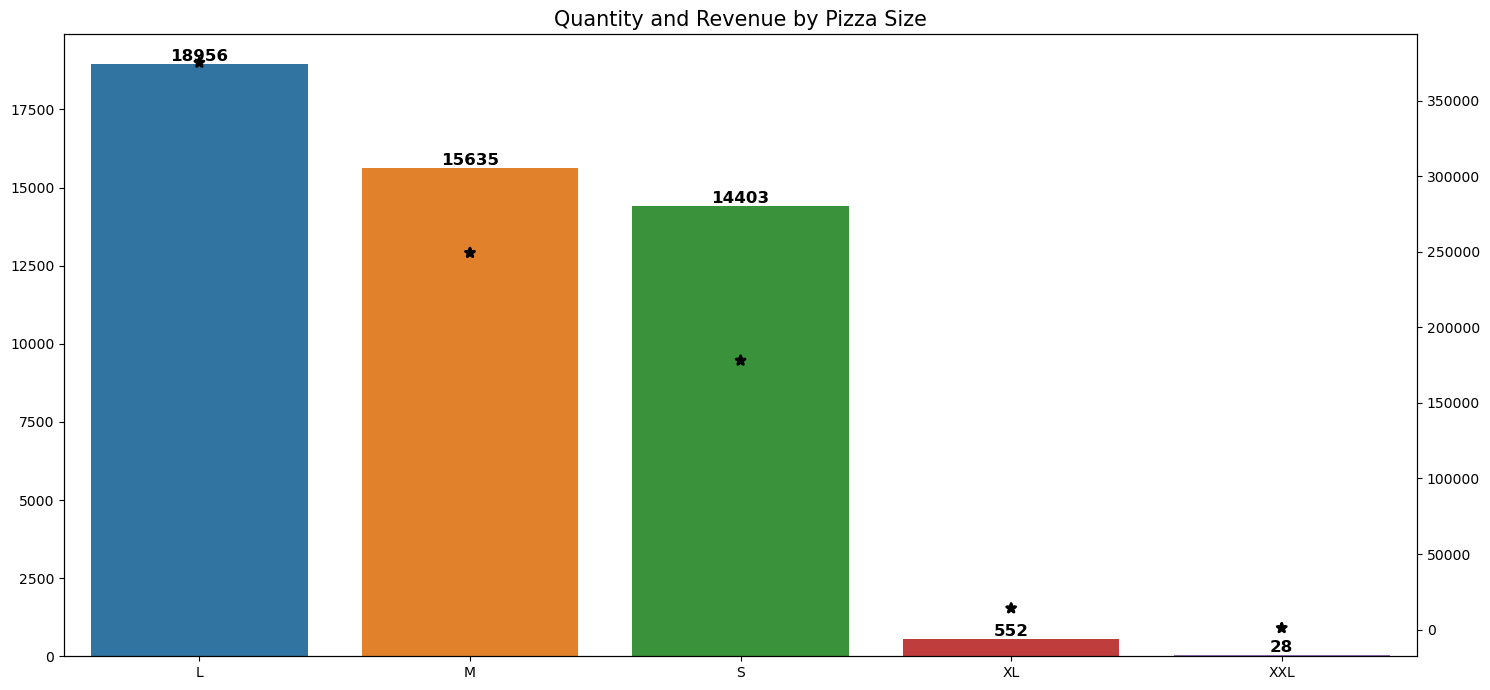

In [21]:
pizza_size_QR = df.groupby('pizza_size').agg({'quantity': sum, 'total_price' : sum}).\
                reset_index().sort_values(by = 'quantity', ascending = False)
display(pizza_size_QR)

fig, ax = plt.subplots(1, 1, figsize = (15,7))

sns.barplot(data = pizza_size_QR, x = 'pizza_size', y = 'quantity', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 12)
ax1 = ax.twinx()
sns.pointplot(data = pizza_size_QR, x = 'pizza_size', y = 'total_price', ax = ax1, linestyles = 'None', \
              markers = '*', color= 'black')

ax.set_title('Quantity and Revenue by Pizza Size', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_ylabel('')

plt.tight_layout()
plt.show();


**💬 Observation:** 
***
- Customers buy the most L-size pizzas, which also brings the highest revenue for this size with 18,956 pieces and 375,318.70
- Large sizes such as XL and XXL are rarely interested by customers and the revenue from these 2 sizes is almost negligible
- Medium sizes are also sold in quite high quantities and revenue

,pizza_category,quantity,total_price
1,Classic,14888.0,220053.10
2,Supreme,11987.0,208197.00
3,Veggie,11649.0,193690.45
0,Chicken,11050.0,195919.50


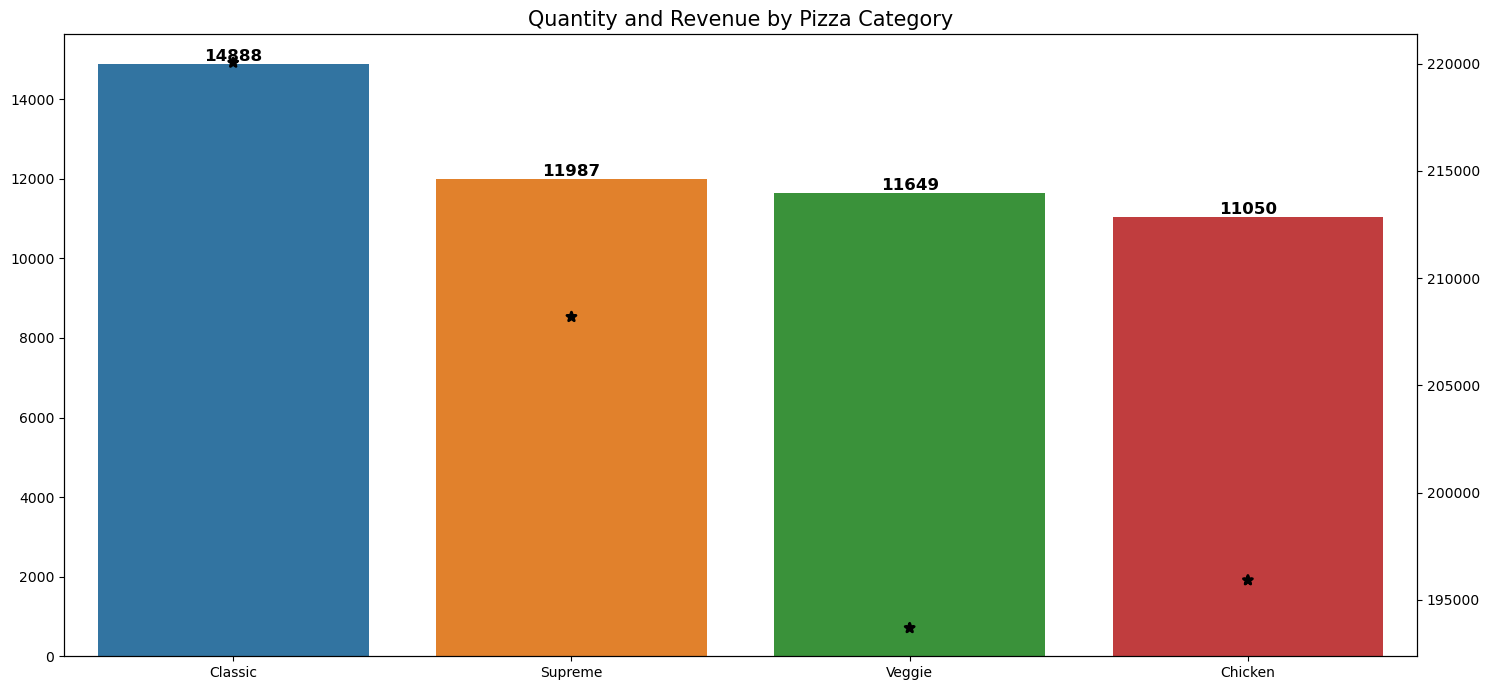

In [22]:
pizza_cat_QR = df.groupby('pizza_category').agg({'quantity': sum, 'total_price' : sum}).\
                reset_index().sort_values(by = 'quantity', ascending = False)
display(pizza_cat_QR)

fig, ax = plt.subplots(1, 1, figsize = (15,7))

sns.barplot(data = pizza_cat_QR, x = 'pizza_category', y = 'quantity', ax = ax)
ax.bar_label(ax.containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 12)
ax1 = ax.twinx()
sns.pointplot(data = pizza_cat_QR, x = 'pizza_category', y = 'total_price', ax = ax1, linestyles = 'None', \
              markers = '*', color= 'black')

ax.set_title('Quantity and Revenue by Pizza Category', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_ylabel('')

plt.tight_layout()
plt.show();

**💬 Observation:** 

1. The sales from the classic pizza group were the highest with 14,888 pizzas and made the pizza group revenue the highest among the 4 groups with 220,053.1
2. The sales from the Chicken Pizza group were the lowest with 11,050 pizzas but the revenue this group brought (195,919.50) was higher than the Veggie group (193,690.45). This is because the selling price of the pizzas in the Chicken group is mostly higher than the selling price of the pizzas in the Veggie group


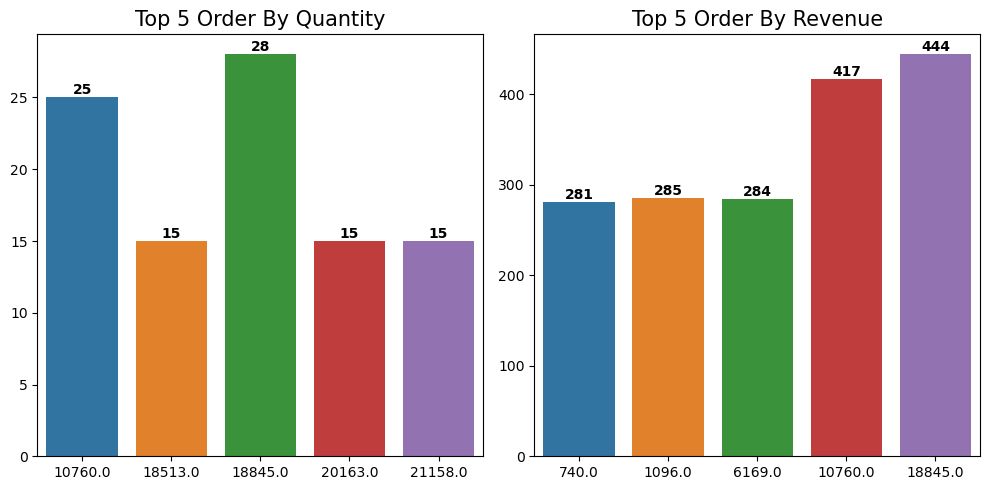

In [23]:
Top5_OD_Q = df.groupby('order_id').agg({'quantity': sum}).reset_index().\
                sort_values(by = 'quantity', ascending = False).head(5)
# display(Top5_OD_Q)

Top5_OD_R = df.groupby('order_id').agg({'total_price': sum}).reset_index().\
            sort_values(by = 'total_price', ascending = False).head(5)
# display(Top5_OD_R)

fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(data = Top5_OD_Q, x = 'order_id', y = 'quantity', ax = ax[0])
ax[0].bar_label(ax[0].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.0f}')

ax[0].set_title('Top 5 Order By Quantity', size = 15)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data = Top5_OD_R, x = 'order_id', y = 'total_price', ax = ax[1])
ax[1].bar_label(ax[1].containers[0], label_type= 'edge', fontweight = 'bold', fontsize = 10, fmt = '{:,.0f}')

ax[1].set_title('Top 5 Order By Revenue', size = 15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show();

**💬 Observation:** 
***
- Order No. 18845 bought the most pizzas with 28, resulting in the highest revenue from this Order of 18,845

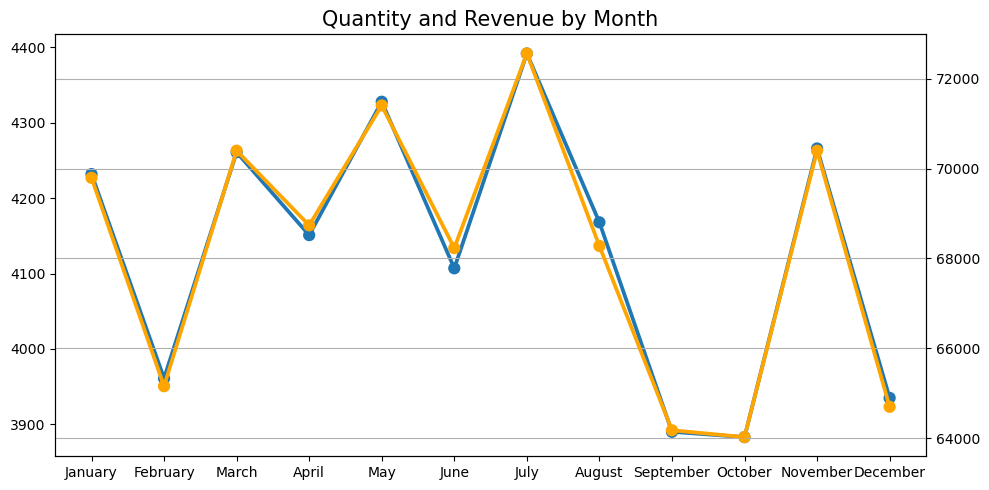

In [24]:
QR_by_month = df[['month', 'month_name','quantity','total_price']].groupby(['month','month_name']).\
                sum(['quantity', 'total_price']).reset_index()
# display(QR_by_month)

fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.pointplot(data = QR_by_month, x = 'month_name', y = 'quantity', ax = ax)
ax1 = ax.twinx()
sns.pointplot(data = QR_by_month, x = 'month_name', y = 'total_price', ax = ax1, color = 'orange')

ax.set_title('Quantity and Revenue by Month', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show();

**💬 Observation:** 

1. Sales and Revenue have almost the same trend
2. Revenue tends to increase gradually from February to July and peaks in July then declines quite sharply from July to October


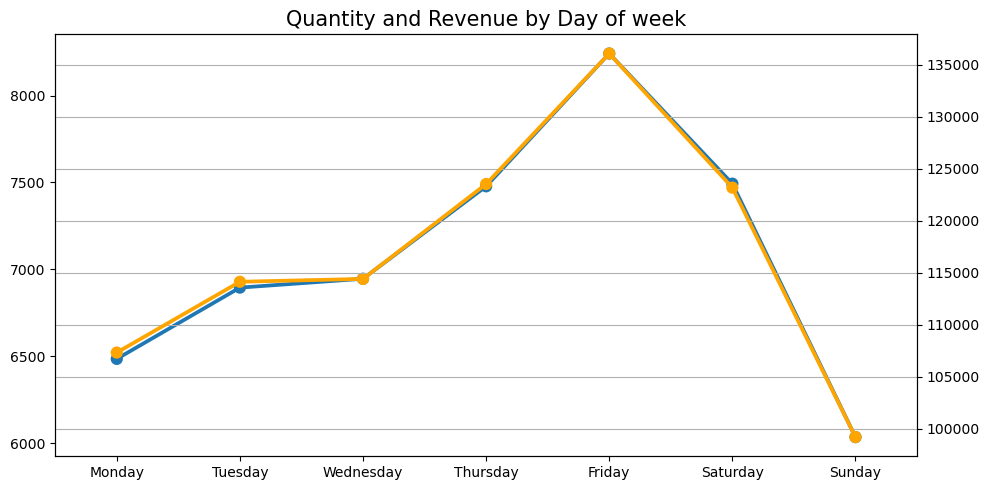

In [25]:
QR_by_Day = df[['day_of_week', 'day_name','quantity','total_price']].groupby(['day_of_week','day_name']).\
                sum(['quantity', 'total_price']).reset_index()
# display(QR_by_Day)

fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.pointplot(data = QR_by_Day, x = 'day_name', y = 'quantity', ax = ax)
ax1 = ax.twinx()
sns.pointplot(data = QR_by_Day, x = 'day_name', y = 'total_price', ax = ax1, color = 'orange')

ax.set_title('Quantity and Revenue by Day of week', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show();

**💬 Observation:** 
***
1. Sales and Revenue have almost the same trend
2. Sales tend to increase gradually from Monday to Friday, peak on Friday, and then drop quite sharply on weekends. It seems that customers are not interested in pizza on weekends and instead choose other options.

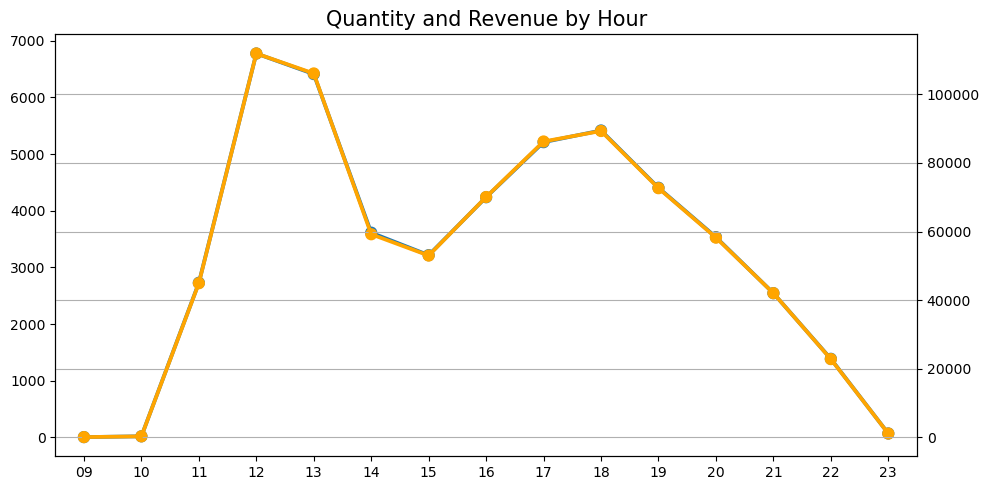

In [26]:
QR_by_Hour = df[['hour','quantity','total_price']].groupby(['hour']).sum(['quantity', 'total_price']).reset_index()
# display(QR_by_Hour)

fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.pointplot(data = QR_by_Hour, x = 'hour', y = 'quantity', ax = ax)
ax1 = ax.twinx()
sns.pointplot(data = QR_by_Hour, x = 'hour', y = 'total_price', ax = ax1, color = 'orange')

ax.set_title('Quantity and Revenue by Hour', size = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax1.set_ylabel('')

plt.grid(True)
plt.tight_layout()
plt.show();

**💬 Observation:** 
***
1. Sales and Revenue have almost the same trend
2. The most pizzas are sold around 12 pm and 5 pm - 6 pm

In [27]:
ingredients = dict()
ingredients_list = df['pizza_ingredients'].tolist()
for recipe in ingredients_list:
    for ingredient in recipe.split(','):
        ingredient = ingredient.strip()
        if ingredient in ingredients:
            ingredients[ingredient] += 1
        else:
            ingredients[ingredient] = 1
            
ingredients_df = pd.DataFrame(list(ingredients.items()), columns=['Ingredient', 'Frequency']).\
                    sort_values(by='Frequency', ascending=False).reset_index(drop = True)

ingredients_df.head(10)

,Ingredient,Frequency
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


**💬 Observation:** 
***
- Garlic, Tomatoes, and Red Onions are the most ingredients used 

In [28]:
df.sample(5)

,pizza_name,pizza_size,pizza_category,pizza_ingredients,order_id,order_date,order_date_time,quantity,unit_price,total_price,year,month_year,month,month_name,day,day_of_week,day_name,hour
2323,The California Chicken Pizza,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",1035.0,2015-01-18,2015-01-18 12:13:15,1.0,16.75,16.75,2015,Jan 2015,1,January,18,6,Sunday,12
18092,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",7943.0,2015-05-13,2015-05-13 20:50:17,1.0,16.00,16.00,2015,May 2015,5,May,13,2,Wednesday,20
38674,The Soppressata Pizza,S,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",17049.0,2015-10-16,2015-10-16 11:49:41,1.0,12.50,12.50,2015,Oct 2015,10,October,16,4,Friday,11
36339,The Green Garden Pizza,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",16045.0,2015-09-27,2015-09-27 20:12:32,1.0,12.00,12.00,2015,Sep 2015,9,September,27,6,Sunday,20
7510,The Soppressata Pizza,S,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",3307.0,2015-02-25,2015-02-25 14:43:41,1.0,12.50,12.50,2015,Feb 2015,2,February,25,2,Wednesday,14


In [29]:
df.columns

Index(['pizza_name', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'order_id', 'order_date', 'order_date_time', 'quantity', 'unit_price',
       'total_price', 'year', 'month_year', 'month', 'month_name', 'day',
       'day_of_week', 'day_name', 'hour'],
      dtype='object')

In [30]:
df1 = df[['pizza_name', 'pizza_size', 'pizza_category', 'unit_price']]
df1

,pizza_name,pizza_size,pizza_category,unit_price
0,The Hawaiian Pizza,M,Classic,13.25
1,The Classic Deluxe Pizza,M,Classic,16.00
2,The Five Cheese Pizza,L,Veggie,18.50
3,The Italian Supreme Pizza,L,Supreme,20.75
4,The Mexicana Pizza,M,Veggie,16.00
...,...,...,...,...
48615,The Chicken Alfredo Pizza,M,Chicken,16.75
48616,The Four Cheese Pizza,L,Veggie,17.95
48617,The Napolitana Pizza,S,Classic,12.00
48618,The Mexicana Pizza,L,Veggie,20.25


In [31]:
def pizza_size(x):
    if x == 'S':
        return 0
    elif x == 'M':
        return 1
    elif x == 'L':
        return 2
    elif x == 'XL':
        return 3
    else:
        return 4
    
df1['pizza_size'] = df1['pizza_size'].apply(pizza_size)
df1.head(1)

,pizza_name,pizza_size,pizza_category,unit_price
0,The Hawaiian Pizza,1,Classic,13.25


In [32]:
# df1['hour'] = df1['hour'].astype('int64')

In [33]:
cat_cols = df1.select_dtypes(include=['object']).columns
cat_cols

Index(['pizza_name', 'pizza_category'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in cat_cols:
    df1[i] = en.fit_transform(df1[i])
    
df1.sample(10)    

,pizza_name,pizza_size,pizza_category,unit_price
11954,16,0,3,12.00
12546,30,1,0,16.75
16504,12,0,1,10.50
5364,8,2,3,18.50
21286,23,0,2,12.25
43649,19,2,2,20.75
1881,6,2,0,20.75
2245,1,0,1,12.00
7577,22,1,2,16.50
47517,19,1,2,16.50


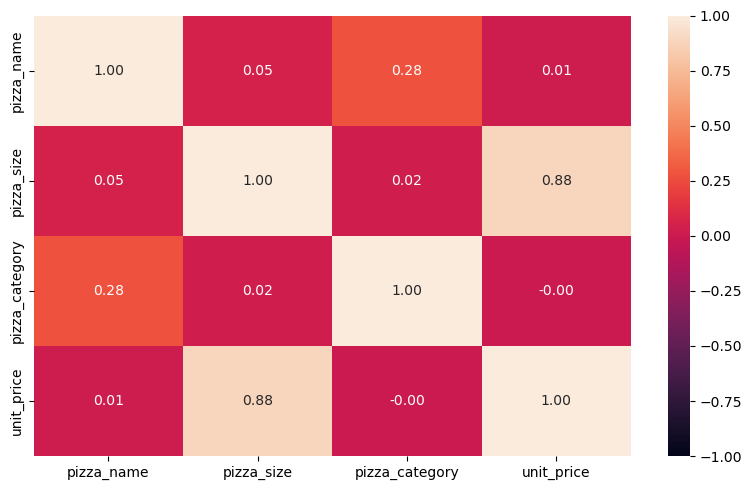

In [35]:
plt.figure(figsize = (8,5))
sns.heatmap(data = df1.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.tight_layout()
plt.show()

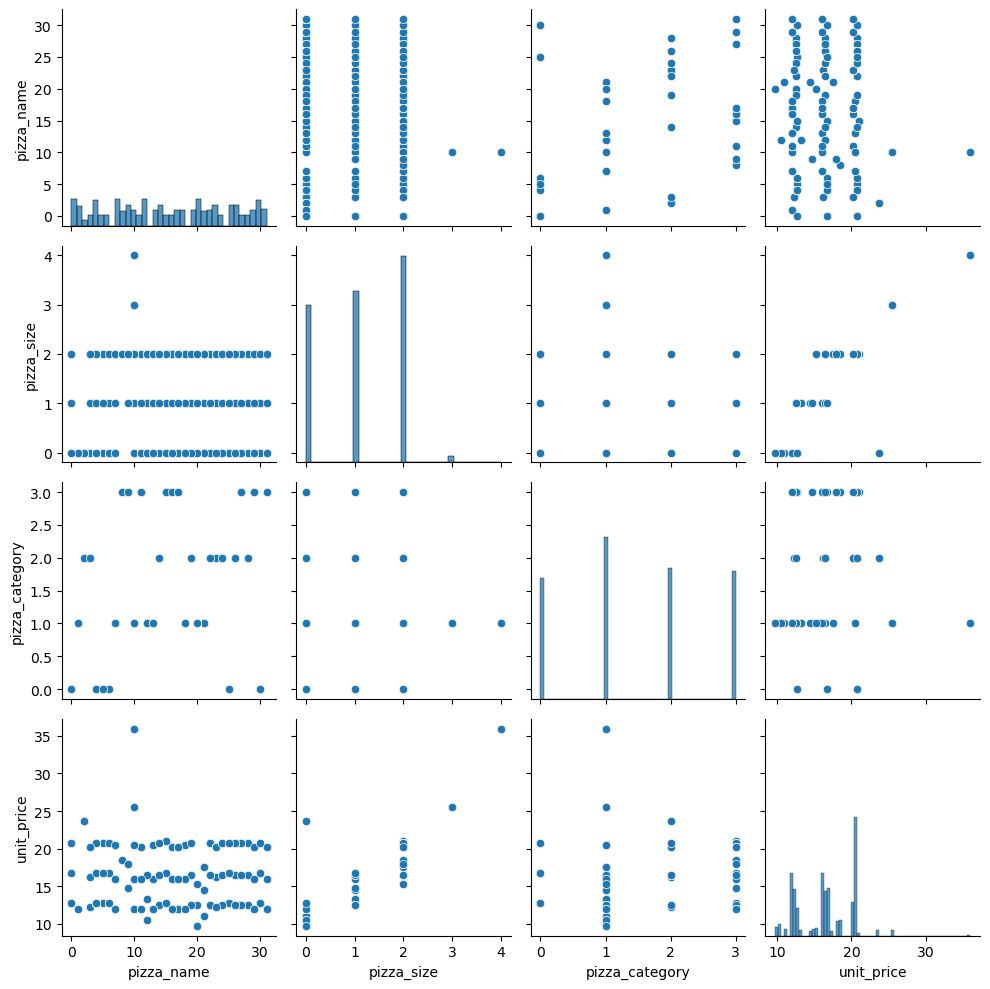

In [36]:
sns.pairplot(data = df1)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression

In [38]:
X = df1.drop('unit_price',axis=1)
y = df1['unit_price']

In [39]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [40]:
# import model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)


LinearRegression()

In [41]:
# Split the data into 5 folds
# Use this 'kf' (KFold splitting stratery) object as input to cross_val_score() method
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

fold = 1 
# Split() method generate indices to split data into training and test set
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{fold}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    fold += 1

Fold:1, Train set: 38896, Test set: 9724
Fold:2, Train set: 38896, Test set: 9724
Fold:3, Train set: 38896, Test set: 9724
Fold:4, Train set: 38896, Test set: 9724
Fold:5, Train set: 38896, Test set: 9724


In [42]:
# Cross validation
score = cross_validate(model_lin, X, y, cv = kf, scoring = ['r2' , 'neg_mean_absolute_error', 'neg_mean_squared_error'],\
                      return_estimator = True)
score

{'fit_time': array([0.0167613 , 0.02157497, 0.01640248, 0.02590322, 0.02786946]),
 'score_time': array([0.00302911, 0.00450754, 0.0082159 , 0.        , 0.01599145]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_r2': array([0.78953999, 0.78199169, 0.78718482, 0.76483189, 0.79405534]),
 'test_neg_mean_absolute_error': array([-0.96671656, -0.98028241, -0.96814708, -1.00275591, -0.96534334]),
 'test_neg_mean_squared_error': array([-2.74281662, -2.90068195, -2.76594212, -3.10304526, -2.68830477])}

In [43]:
score.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_r2', 'test_neg_mean_absolute_error', 'test_neg_mean_squared_error'])

In [44]:
# mean of R2 after 5 Folds
score['test_r2'].mean()

0.7835207470037564

In [45]:
# mean of MAE after 5 Folds
score['test_neg_mean_absolute_error'].mean()

-0.976649059245608

In [46]:
# mean of MSE after 5 Folds
score['test_neg_mean_squared_error'].mean()

-2.8401581436104912

In [47]:
# Print coefficients and intercepts
for i in range(0,5):
    print('intercepts fold {}:'.format(i), score['estimator'][i].intercept_)   #b
    print('Coefficient fold {}:'.format(i), score['estimator'][i].coef_)  #a

intercepts fold 0: 12.495924761759213
Coefficient fold 0: [-0.0116023   3.80905728 -0.04629772]
intercepts fold 1: 12.482435581897452
Coefficient fold 1: [-0.01084896  3.81334305 -0.04859602]
intercepts fold 2: 12.498866634314266
Coefficient fold 2: [-0.01158155  3.81503698 -0.04872347]
intercepts fold 3: 12.472053631592885
Coefficient fold 3: [-0.01001     3.82522013 -0.05674638]
intercepts fold 4: 12.508939515937655
Coefficient fold 4: [-0.01148399  3.8024756  -0.04916908]


In [48]:
import statsmodels.api as sm

In [49]:
X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()
predictions = model.predict(X_sm)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 5.866e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:29:07   Log-Likelihood:                -94359.
No. Observations:               48620   AIC:                         1.887e+05
Df Residuals:                   48616   BIC:                         1.888e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.4917      0.019    656.

In [50]:
y_pred = model_lin.predict(X_test)

In [51]:
X_test

,pizza_name,pizza_size,pizza_category
21543,30,1,0
36986,0,1,0
9691,7,0,1
18706,3,1,2
23508,27,2,3
...,...,...,...
14235,23,0,2
10858,8,2,3
704,12,0,1
13068,3,1,2


In [52]:
y_pred

array([15.95691312, 16.30498204, 12.36841096, ..., 12.31039947,
       16.17757971, 19.83569566])